# ARIMA-CNN-LSTM Futures Trading Strategy


This trading strategy uses an ARIMA-CNN-LSTM model architecture.

### 1. Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm  # acf,pacf plot
from numpy import array
from keras.layers import *
from keras.layers import LSTM
from keras.models import *
from datetime import datetime

import os, sys

sys.path.append(os.path.abspath('../pysystemtrade'))
print(sys.path)

from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
from sysquant.estimators.vol import robust_vol_calc
from systems.accounts.account_forecast import pandl_for_instrument_forecast

import csv

2023-06-16 18:27:41.774844: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


['/rds/general/user/zm520/home/notebooks', '/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python39.zip', '/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9', '/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/lib-dynload', '', '/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages', '/rds/general/user/zm520/home/pysystemtrade']


### 2. Reading Data

In [5]:
S_P_500 = 'ES'
NASDAQ = 'NQ'
EUROSTOXX = 'FX'
DAX = 'DY'
FT_100 = 'X'

equity_futures = [S_P_500, NASDAQ, EUROSTOXX, DAX, FT_100]

In [6]:
CRUDE_OIL = 'CL'
NAT_GAS = 'NG'
BRENT_CRUDE = 'BZ'
GAS = 'RB'
HEAT_OIL = 'HO'

fuel_futures = [CRUDE_OIL, NAT_GAS, BRENT_CRUDE, GAS, HEAT_OIL]

### 3. ARIMA-CNN-LSTM Backtesting

#### 3.1 ARIMA-CNN-LSTM on Fuel contracts

In [1]:
def split_sequence(data_sequence, n_steps):
    """_summary_

    Args:
        data_sequence (_type_): _description_
        n_steps (_type_): _description_

    Returns:
        _type_: _description_
    """
    inputs, outputs = [], []
    for i in range(len(data_sequence)):
        end = i + n_steps
        if end > len(data_sequence) - 1:
            break
        seq_x, seq_y = data_sequence[i:end], data_sequence[end]
        inputs.append(seq_x)
        outputs.append(seq_y)
    return array(inputs), array(outputs)

SYMBOL: CL


/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 2000x1000 with 0 Axes>

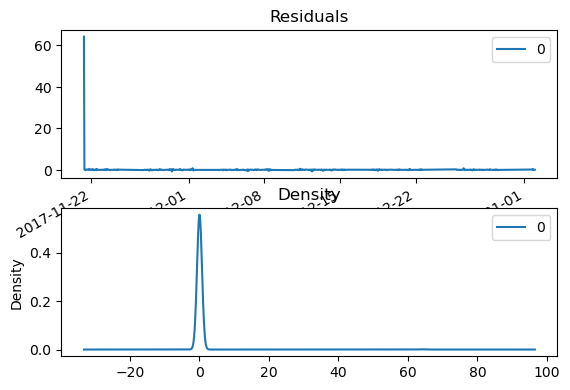

here
(624, 6)
here
2023-06-15 20:05:31.680697:0
2023-06-15 20:05:39.756584:100
2023-06-15 20:05:47.746310:200
2023-06-15 20:05:55.779786:300
2023-06-15 20:06:03.887501:400
2023-06-15 20:06:11.904522:500
2023-06-15 20:06:19.916005:600
2023-06-15 20:06:27.868787:700
2023-06-15 20:06:37.046625:800
2023-06-15 20:06:45.267643:900
2023-06-15 20:06:53.189481:1000
2023-06-15 20:07:01.104673:1100
2023-06-15 20:07:09.049841:1200
2023-06-15 20:07:16.941455:1300
2023-06-15 20:07:24.913362:1400
2023-06-15 20:07:32.903388:1500
2023-06-15 20:07:40.860420:1600
2023-06-15 20:07:48.827356:1700
2023-06-15 20:07:56.737195:1800
2023-06-15 20:08:04.741434:1900
2023-06-15 20:08:12.688329:2000
2023-06-15 20:08:20.597591:2100
2023-06-15 20:08:28.681322:2200
2023-06-15 20:08:36.687402:2300
2023-06-15 20:08:44.714194:2400
2023-06-15 20:08:52.614433:2500
2023-06-15 20:09:00.504514:2600
2023-06-15 20:09:08.374709:2700
2023-06-15 20:09:16.191866:2800
2023-06-15 20:09:23.995319:2900
2023-06-15 20:09:31.655686:3000
2

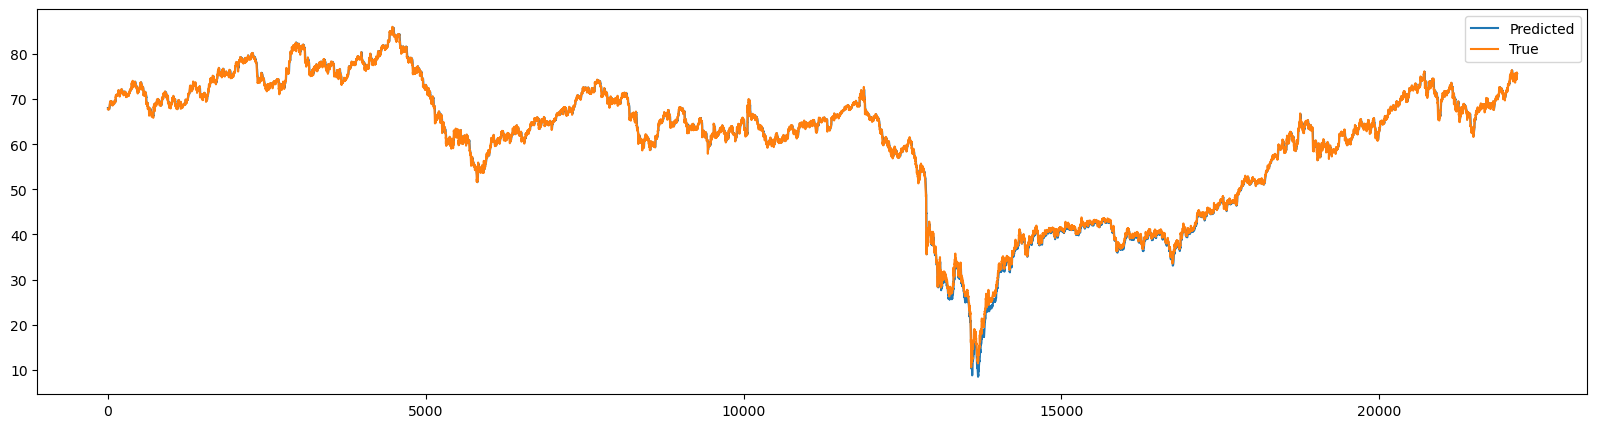

2023-06-15 20:35:06 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesMultiplePricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 20:35:06 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesInstrumentData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 20:35:06 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 20:35:06 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 20:35:06 {'type': 'csvFuturesSimData'} [Warning] No key for csvSpreadCostData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
Datetime
2018-01-02 06:00:00    67.88
2018-01-02 07:00:00    67.94
2018-01-02 08:00:00    67.78
2018-01-0

/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 2000x1000 with 0 Axes>

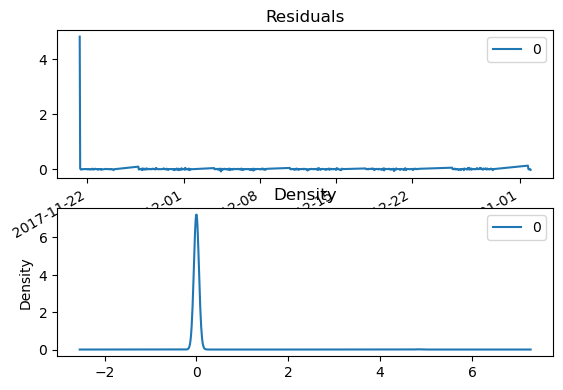

here
(624, 6)
here
2023-06-15 20:35:11.490423:0
2023-06-15 20:35:19.294205:100
2023-06-15 20:35:27.094662:200
2023-06-15 20:35:34.811196:300
2023-06-15 20:35:42.494922:400
2023-06-15 20:35:50.212472:500
2023-06-15 20:35:57.898266:600
2023-06-15 20:36:05.659017:700
2023-06-15 20:36:13.355125:800
2023-06-15 20:36:21.040025:900
2023-06-15 20:36:28.704611:1000
2023-06-15 20:36:36.408465:1100
2023-06-15 20:36:44.112591:1200
2023-06-15 20:36:51.765913:1300
2023-06-15 20:36:59.454851:1400
2023-06-15 20:37:07.096793:1500
2023-06-15 20:37:14.901635:1600
2023-06-15 20:37:22.680234:1700
2023-06-15 20:37:30.463716:1800
2023-06-15 20:37:39.370012:1900
2023-06-15 20:37:48.112539:2000
2023-06-15 20:37:57.014437:2100
2023-06-15 20:38:06.032181:2200
2023-06-15 20:38:14.235708:2300
2023-06-15 20:38:22.063366:2400
2023-06-15 20:38:30.002896:2500
2023-06-15 20:38:37.934317:2600
2023-06-15 20:38:45.820885:2700
2023-06-15 20:38:53.773556:2800
2023-06-15 20:39:01.733385:2900
2023-06-15 20:39:09.648238:3000
2

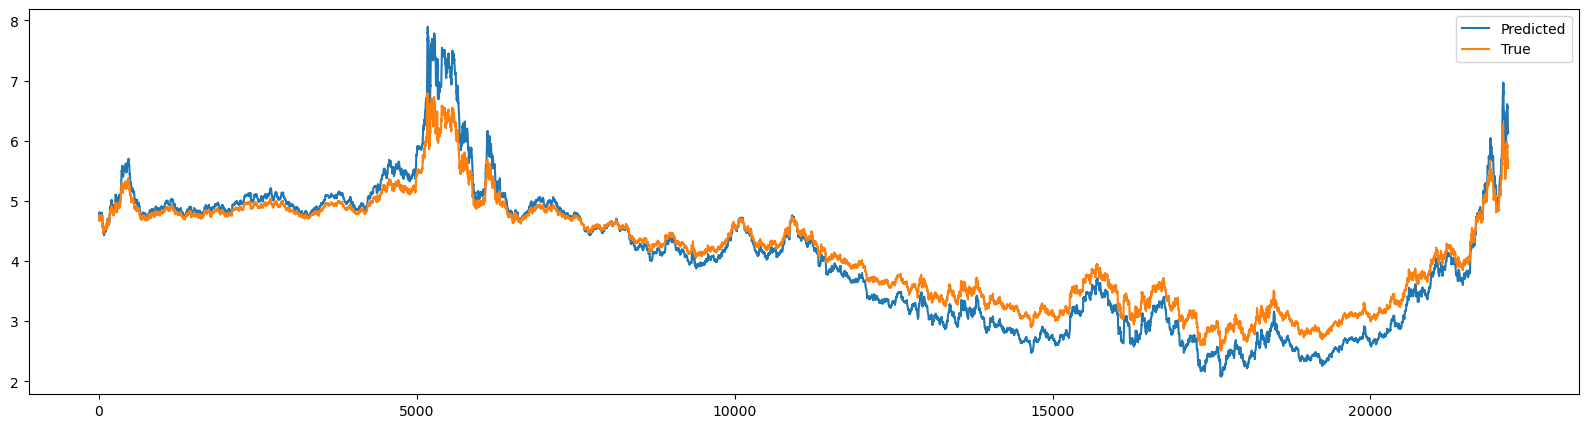

2023-06-15 21:04:49 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesMultiplePricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 21:04:49 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesInstrumentData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 21:04:49 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 21:04:49 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 21:04:49 {'type': 'csvFuturesSimData'} [Warning] No key for csvSpreadCostData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
Datetime
2018-01-02 06:00:00    4.670
2018-01-02 07:00:00    4.715
2018-01-02 08:00:00    4.742
2018-01-0

/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


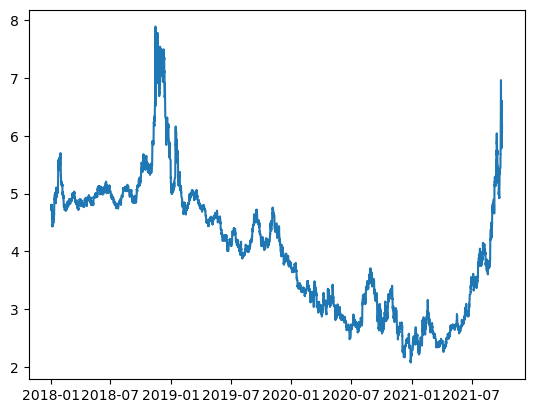

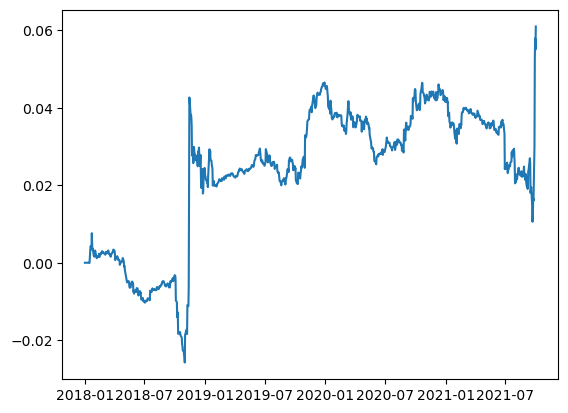

<Figure size 2000x1000 with 0 Axes>

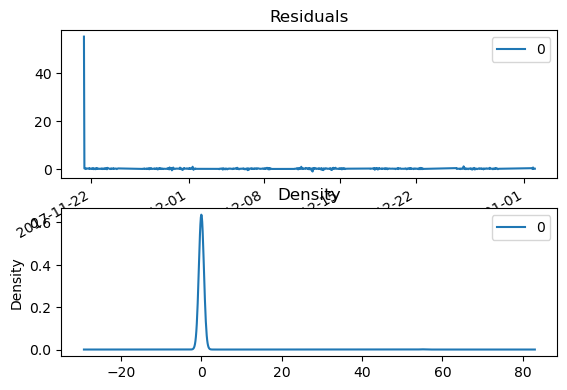

here
(624, 6)
here
2023-06-15 21:04:54.794097:0
2023-06-15 21:05:02.903804:100
2023-06-15 21:05:10.801547:200
2023-06-15 21:05:18.813680:300
2023-06-15 21:05:27.267138:400
2023-06-15 21:05:35.208257:500
2023-06-15 21:05:43.202862:600
2023-06-15 21:05:52.112101:700
2023-06-15 21:06:00.967222:800
2023-06-15 21:06:08.962424:900
2023-06-15 21:06:16.995878:1000
2023-06-15 21:06:24.959309:1100
2023-06-15 21:06:32.904718:1200
2023-06-15 21:06:40.757531:1300
2023-06-15 21:06:48.677242:1400
2023-06-15 21:06:56.624735:1500
2023-06-15 21:07:04.569890:1600
2023-06-15 21:07:12.520465:1700
2023-06-15 21:07:20.376481:1800
2023-06-15 21:07:28.254626:1900
2023-06-15 21:07:36.133512:2000
2023-06-15 21:07:44.014362:2100
2023-06-15 21:07:51.890103:2200
2023-06-15 21:07:59.754624:2300
2023-06-15 21:08:07.608046:2400
2023-06-15 21:08:15.523979:2500
2023-06-15 21:08:23.401540:2600
2023-06-15 21:08:31.043118:2700
2023-06-15 21:08:38.813280:2800
2023-06-15 21:08:46.635421:2900
2023-06-15 21:08:54.445325:3000
2

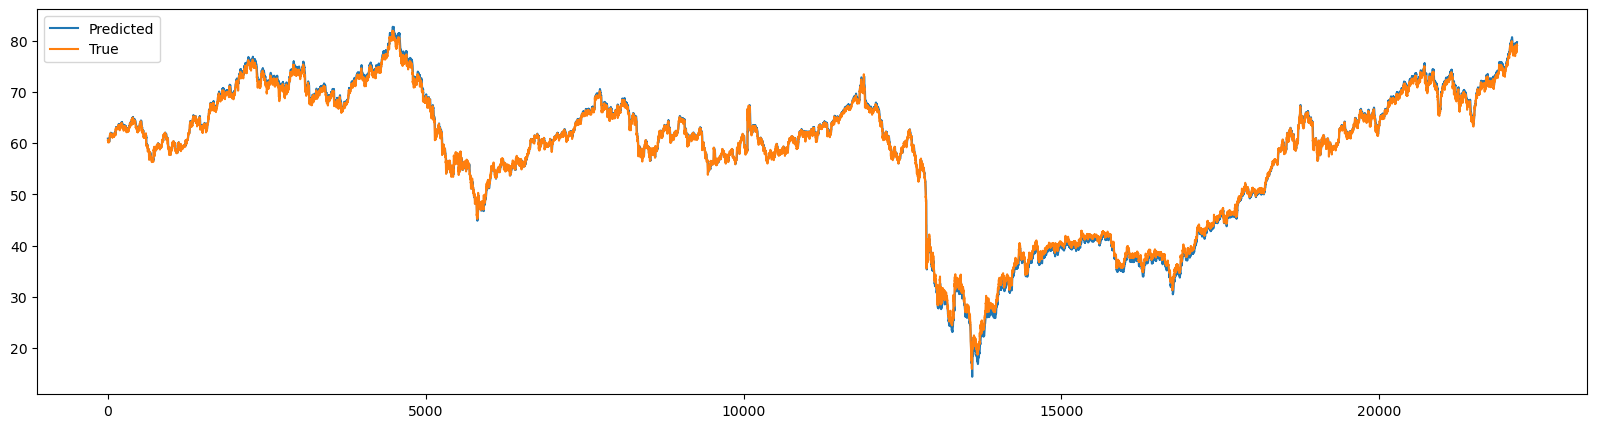

2023-06-15 21:34:58 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesMultiplePricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 21:34:58 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesInstrumentData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 21:34:58 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 21:34:58 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 21:34:58 {'type': 'csvFuturesSimData'} [Warning] No key for csvSpreadCostData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
Datetime
2018-01-02 06:00:00    60.66
2018-01-02 07:00:00    60.69
2018-01-02 08:00:00    60.45
2018-01-0

/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


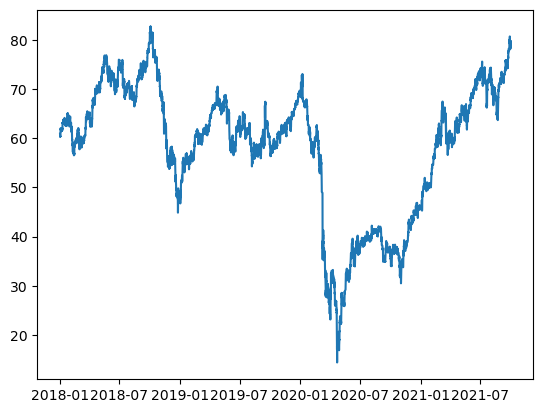

<Figure size 2000x1000 with 0 Axes>

here
(624, 6)
here
2023-06-15 21:35:04.316154:0
2023-06-15 21:35:13.414708:100
2023-06-15 21:35:22.059943:200
2023-06-15 21:35:30.048504:300
2023-06-15 21:35:37.975245:400
2023-06-15 21:35:45.905042:500
2023-06-15 21:35:53.716823:600
2023-06-15 21:36:01.758262:700
2023-06-15 21:36:10.114931:800
2023-06-15 21:36:18.355085:900
2023-06-15 21:36:26.656057:1000
2023-06-15 21:36:34.779879:1100
2023-06-15 21:36:42.818239:1200
2023-06-15 21:36:50.790881:1300
2023-06-15 21:36:58.803845:1400
2023-06-15 21:37:06.787102:1500
2023-06-15 21:37:14.789984:1600
2023-06-15 21:37:22.694037:1700
2023-06-15 21:37:30.597747:1800
2023-06-15 21:37:38.576323:1900
2023-06-15 21:37:46.899776:2000
2023-06-15 21:37:54.976990:2100
2023-06-15 21:38:02.997817:2200
2023-06-15 21:38:11.037552:2300
2023-06-15 21:38:19.125149:2400
2023-06-15 21:38:27.161098:2500
2023-06-15 21:38:35.584076:2600
2023-06-15 21:38:43.986951:2700
2023-06-15 21:38:52.329110:2800
2023-06-15 21:39:00.652376:2900
2023-06-15 21:39:12.006709:3000
2

2023-06-15 22:04:51 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesMultiplePricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 22:04:51 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesInstrumentData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 22:04:51 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 22:04:51 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 22:04:51 {'type': 'csvFuturesSimData'} [Warning] No key for csvSpreadCostData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
Datetime
2018-01-02 06:00:00    1.4450
2018-01-02 07:00:00    1.4448
2018-01-02 08:00:00    1.4331
2018-0

/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


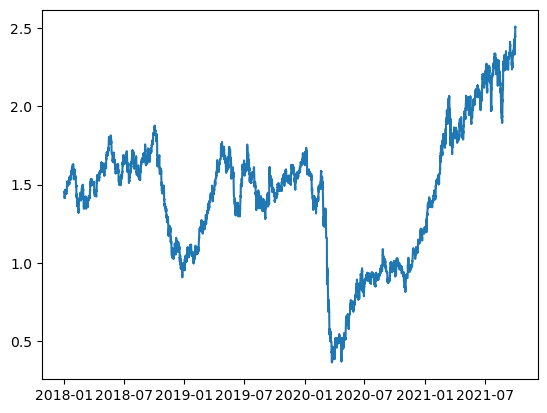

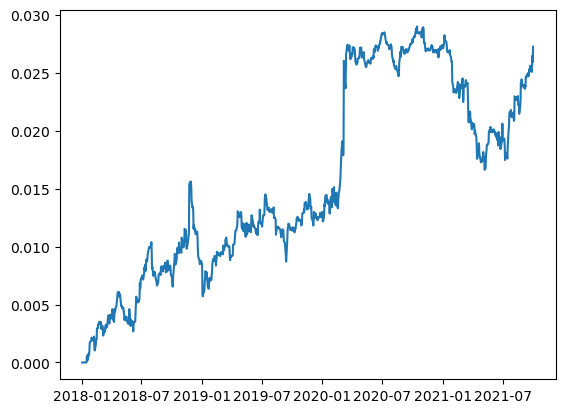

<Figure size 2000x1000 with 0 Axes>

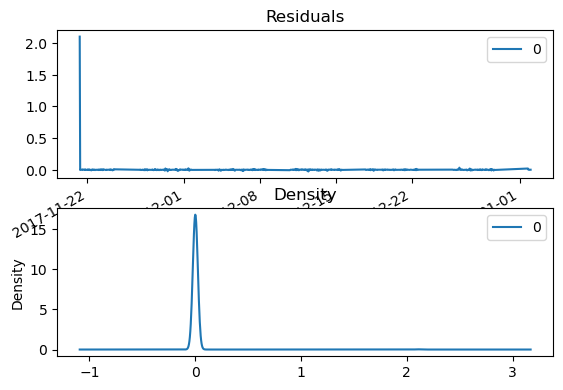

here
(624, 6)
here
2023-06-15 22:04:57.221870:0
2023-06-15 22:05:05.080999:100
2023-06-15 22:05:13.032235:200
2023-06-15 22:05:20.820464:300
2023-06-15 22:05:29.052420:400
2023-06-15 22:05:37.291623:500
2023-06-15 22:05:45.590655:600
2023-06-15 22:05:53.811852:700
2023-06-15 22:06:02.011424:800
2023-06-15 22:06:10.234584:900
2023-06-15 22:06:18.254068:1000
2023-06-15 22:06:26.266573:1100
2023-06-15 22:06:34.258112:1200
2023-06-15 22:06:42.268292:1300
2023-06-15 22:06:50.291032:1400
2023-06-15 22:06:58.336297:1500
2023-06-15 22:07:06.299102:1600
2023-06-15 22:07:14.308538:1700
2023-06-15 22:07:22.189480:1800
2023-06-15 22:07:32.123226:1900
2023-06-15 22:07:41.720606:2000
2023-06-15 22:07:50.527391:2100
2023-06-15 22:07:58.524987:2200
2023-06-15 22:08:06.389231:2300
2023-06-15 22:08:14.251028:2400
2023-06-15 22:08:22.186608:2500
2023-06-15 22:08:30.101429:2600
2023-06-15 22:08:38.014281:2700
2023-06-15 22:08:45.979892:2800
2023-06-15 22:08:53.887003:2900
2023-06-15 22:09:01.788254:3000
2

2023-06-15 22:35:17 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesMultiplePricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 22:35:17 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesInstrumentData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 22:35:17 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 22:35:17 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-15 22:35:17 {'type': 'csvFuturesSimData'} [Warning] No key for csvSpreadCostData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
Datetime
2018-01-02 06:00:00    2.2414
2018-01-02 07:00:00    2.2448
2018-01-02 08:00:00    2.2376
2018-0

In [43]:
# Read in data
futures_data = pd.read_parquet('../data/fuel_first_rate_data_R_prices.parquet')

# Array for accumulating backtest results
accounts = []
for i in range(len(fuel_futures)):
    print(f"SYMBOL: {fuel_futures[i]}")
    # Get current data
    curr_futures_data = futures_data[fuel_futures[i]]
    

    # Configure test and training sets
    test_start_datetime = pd.Timestamp('2018-01-02')
    
    short_train_set_size = 1000
    train_start_datetime = test_start_datetime - pd.Timedelta(hours=short_train_set_size)
    short_training_set = curr_futures_data.loc[train_start_datetime:test_start_datetime]
    
    short_test_set = curr_futures_data.loc[test_start_datetime:]
    
    # Train ARIMA on training set
    model2 = sm.tsa.ARIMA(endog=short_training_set, order=(2, 1, 0)).fit()
    residuals = pd.DataFrame(model2.resid)

    # Plot the KDE of the residuals
    plt.figure(figsize=(20, 10))
    fig, ax = plt.subplots(2, 1)
    residuals.plot(title="Residuals", ax=ax[0])
    residuals.plot(kind='kde', title='Density', ax=ax[1])
    plt.savefig(f'../ARIMA-CNN-LSTM-figs/{fuel_futures[i]}_ARIMA_residuals')
    plt.show()
    
    # Save the ARIMA residuals
    residuals.to_csv(f'../ARIMA-CNN-LSTM-saved-data/{fuel_futures[i]}_ARIMA_residuals.csv')
    
    time_steps = 6

    short_train_X, short_train_y = split_sequence(short_training_set, time_steps)

    short_test_X, short_test_y = split_sequence(short_test_set, time_steps)
    
    batch_size = 7
    lstm_units = 64

    # Reshape training data
    n_seq = 2
    n_steps = time_steps // n_seq
    short_train_X = short_train_X.reshape(short_train_X.shape[0], n_seq, n_steps, 1)

    # Create the CNN-LSTM Model
    cnn_lstm_model = Sequential()
    cnn_lstm_model.add(
        TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, 1)))
    cnn_lstm_model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    cnn_lstm_model.add(TimeDistributed(Flatten()))
    cnn_lstm_model.add(LSTM(50, activation='relu'))
    cnn_lstm_model.add(Dense(1))
    cnn_lstm_model.compile(optimizer='adam', loss='mse')

    # CNN-LSTM model
    cnn_lstm_model.fit(short_train_X, short_train_y, epochs=50, verbose=0)
    print('here')
    predictions = []
    for j, test_sample in enumerate(short_test_X):
        # For each test sample, make a prediction and append to an overall list of predictions
        test_sample = test_sample.reshape(1, n_seq, n_steps, 1)
        pred_price = cnn_lstm_model.predict(test_sample, verbose = 0)
        reshaped_pred_price = np.reshape(pred_price, (1,)).item()
        predictions.append(reshaped_pred_price)
        if (j % 100 == 0):
            print(str(datetime.now()) + ':' + str(j))

    # Plot predicted vs true prices and save the figure
    plt.figure(figsize=(20,5))
    plt.plot(predictions, label='Predicted')
    plt.plot(short_test_y, label='True')
    plt.legend()
    plt.savefig(f'../ARIMA-CNN-LSTM-figs/{fuel_futures[i]}_pred_true')
    plt.show()
    
    # Save the predictions in csv files
    predictions = pd.Series(predictions, index=short_test_set.index[time_steps:])
    predictions.to_csv(f'../ARIMA-CNN-LSTM-saved-data/{fuel_futures[i]}_predictions.csv')
    plt.plot(predictions)

    ### BACKTESTING
    
    forecasts = predictions.diff()
    
    source_dataframe = pd.read_parquet('../data/fuel_first_rate_data_R_prices.parquet')

    column = fuel_futures[i]

    # Convert column into csv file
    csv_path = f"../pysystemtrade/data/firstrate_futures/{fuel_futures[i]}.csv"
    futures_data[fuel_futures[i]].to_csv(csv_path, header=["price"])

    # Replaces 'Datetime' with 'DATETIME' in csv file to match with pysystemtrade's data
    in_csv_file = open(csv_path, "r")
    csv_reader = csv.reader(in_csv_file)

    lines = list(csv_reader)
    lines[0][0] = 'DATETIME'  # The cell at (0,0) will always be 'Datetime'

    out_csv_file = open(csv_path, "w")
    csv_writer = csv.writer(out_csv_file)
    csv_writer.writerows(lines)

    in_csv_file.close()
    out_csv_file.close()

    # Convert csv data into data object for pysystemtrade
    instrument_data = csvFuturesSimData(csv_data_paths=dict(csvFuturesAdjustedPricesData="data.firstrate_futures"))

    price = instrument_data.get_raw_price(column)[test_start_datetime:]
    
    price = curr_futures_data[test_start_datetime:]
    price = price[time_steps:]
    
    account = pandl_for_instrument_forecast(forecast=forecasts, price=price)
    accounts.append(account)
    
    plt.figure()
    plt.plot(account.curve(), label={fuel_futures[i]})
    plt.savefig(f'../ARIMA-CNN-LSTM-figs/{fuel_futures[i]}_pnl')
    plt.show()

In [44]:
figure, axs = plt.subplots(2, 1, figsize=(20, 10))    
for l in range(len(fuel_futures)):
    axs[0].plot(accounts[l].curve(), label=f'{fuel_futures[l]}')
    axs[0].title.set_text('Profit and Loss (ARIMA-CNN-LSTM)')
    axs[0].legend()
    axs[0].set_ylabel('PnL')
    axs[0].set_xlabel('Time')

    axs[1].plot(accounts[l].drawdown(), label=f'{fuel_futures[l]}')
    axs[1].legend()
    axs[1].title.set_text('Drawdown (ARIMA-CNN-LSTM)')
    axs[1].set_ylabel('Drawdown')
    axs[1].set_xlabel('Time')

### 4. ARIMA-CNN-LSTM on Fuel Contracts
- This implementation simply grabs the pre-computed predictions

In [100]:
fuel_accounts = []
for i in range(len(fuel_futures)):
    
    fuel_preds = pd.read_csv(f'../ARIMA-CNN-LSTM-saved-data/{fuel_futures[i]}_predictions.csv', parse_dates=True)
    fuel_preds['Datetime'] = pd.to_datetime(fuel_preds['Datetime'])
    fuel_preds = fuel_preds.set_index(['Datetime'])
    
    forecasts = fuel_preds.diff()
    print(forecasts)
    futures_data = pd.read_parquet('../data/fuel_first_rate_data_R_prices.parquet')

    column = fuel_futures[i]

    # Convert column into csv file
    csv_path = f"../pysystemtrade/data/firstrate_futures/{fuel_futures[i]}.csv"
    futures_data[fuel_futures[i]].to_csv(csv_path, header=["price"])

    # Replaces 'Datetime' with 'DATETIME' in csv file to match with pysystemtrade's data
    in_csv_file = open(csv_path, "r")
    csv_reader = csv.reader(in_csv_file)

    lines = list(csv_reader)
    lines[0][0] = 'DATETIME'  # The cell at (0,0) will always be 'Datetime'

    out_csv_file = open(csv_path, "w")
    csv_writer = csv.writer(out_csv_file)
    csv_writer.writerows(lines)

    in_csv_file.close()
    out_csv_file.close()

    # Convert csv data into data object for pysystemtrade
    instrument_data = csvFuturesSimData(csv_data_paths=dict(csvFuturesAdjustedPricesData="data.firstrate_futures"))

    # Get daily prices and calculate the ewmac forecast
    price = instrument_data.get_raw_price(fuel_futures[i])[test_start_datetime:]
    price = price[time_steps:]
    
    account = pandl_for_instrument_forecast(forecast=forecasts['0'], price=price)
    fuel_accounts.append(account)
    
print(fuel_accounts)

                            0
Datetime                     
2018-01-02 06:00:00       NaN
2018-01-02 07:00:00 -0.072823
2018-01-02 08:00:00  0.041367
2018-01-02 09:00:00 -0.055046
2018-01-02 10:00:00 -0.098015
...                       ...
2021-10-01 12:00:00  0.005745
2021-10-01 13:00:00  0.083183
2021-10-01 14:00:00  0.443375
2021-10-01 15:00:00  0.214043
2021-10-01 16:00:00  0.034492

[22167 rows x 1 columns]
2023-06-16 12:17:24 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesMultiplePricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 12:17:24 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesInstrumentData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 12:17:24 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 12:17:24 {'type': 'csvFuturesSim

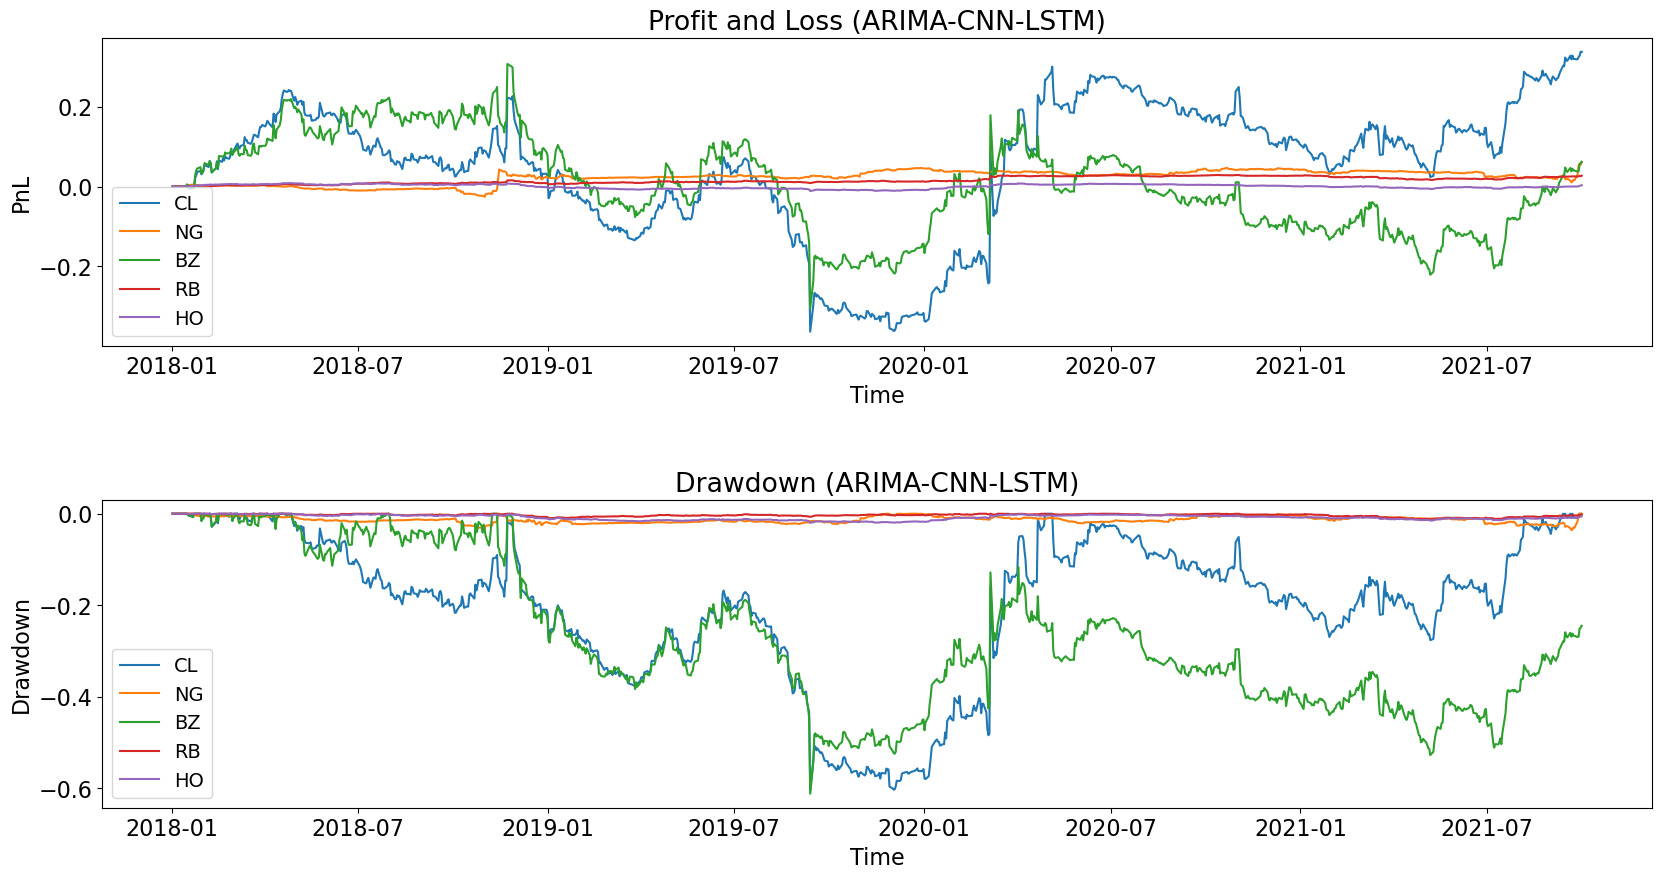

In [103]:
plt.rcParams.update({
    "font.size": 16,
    "legend.fontsize": 14
})

figure, axs = plt.subplots(2, 1, figsize=(20, 10))
figure.subplots_adjust(hspace=0.5)

for i in range(len(fuel_futures)):
    axs[0].plot(fuel_accounts[i].curve(), label=f'{fuel_futures[i]}')
    axs[0].title.set_text('Profit and Loss (ARIMA-CNN-LSTM)')
    axs[0].legend()
    axs[0].set_ylabel('PnL')
    axs[0].set_xlabel('Time')

    axs[1].plot(fuel_accounts[i].drawdown(), label=f'{fuel_futures[i]}')
    axs[1].legend()
    axs[1].title.set_text('Drawdown (ARIMA-CNN-LSTM)')
    axs[1].set_ylabel('Drawdown')
    axs[1].set_xlabel('Time')

In [104]:
fuel_account_statistics = pd.DataFrame(columns=fuel_futures)

for i in range(len(fuel_accounts)):
    
    fuel_account_statistics['STATISTICS'] = pd.Series(list(dict(fuel_accounts[i].percent.stats()[0]).keys()))

    fuel_account_statistics[fuel_futures[i]] = pd.Series([float(x) for x in list(dict(fuel_accounts[i].percent.stats()[0]).values())])
    
    print(round(fuel_accounts[i].curve().iloc[-1], 6))
            
fuel_account_statistics_rounded = fuel_account_statistics.round(decimals=6)
fuel_account_statistics_rounded

0.337029
0.060949
0.061923
0.027243
0.003228


CL        NG        BZ        RB        HO              STATISTICS
0  -0.170600 -0.009095 -0.164200 -0.002390 -0.003555                     min
1   0.321900  0.024680  0.288800  0.007827  0.005932                     max
2  -0.000068  0.000000 -0.000146  0.000016 -0.000002                  median
3   0.000344  0.000062  0.000063  0.000028  0.000003                    mean
4   0.019170  0.001918  0.019170  0.000524  0.000510                     std
5   4.352000  6.197000  2.860000  3.782000  1.301000                    skew
6   0.088130  0.015940  0.016190  0.007124  0.000844                ann_mean
7   0.306700  0.030690  0.306700  0.008389  0.008153                 ann_std
8   0.287400  0.519300  0.052790  0.849200  0.103500                  sharpe
9   0.410000  0.920900  0.072500  1.363000  0.147700                 sortino
10 -0.199800 -0.013010 -0.270100 -0.003306 -0.008146            avg_drawdown
11  0.946900  0.968300  0.960200  0.924400  0.961200        time_in_drawdown
12  0.145700  0.443500  0.026460  0.576200  0.042520                  calmar
13  0.441100  1.225000  0.059940  2.155000  0.103600  avg_return_to_drawdown
14 -0.009126 -0.000792 -0.010420 -0.000309 -0.000322                avg_loss
15  0.010200  0.000916  0.010920  0.000326  0.000339                avg_gain
16  1.118000  1.157000  1.048000  1.057000  1.052000         gaintolossratio
17  1.075000  1.159000  1.012000  1.194000  1.020000            profitfactor
18  0.490200  0.500500  0.491200  0.530400  0.492300                 hitrate
19  0.561900  1.016000  0.103200  1.661000  0.202500                  t_stat
20  0.574300  0.310100  0.917800  0.097120  0.839600                 p_value

In [65]:
account_statistics = pd.DataFrame(columns=fuel_futures)

for i in range(len(accounts)):
    
    account_statistics['STATISTICS'] = pd.Series(list(dict(accounts[i].percent.stats()[0]).keys()))

    account_statistics[fuel_futures[i]] = pd.Series([float(x) for x in list(dict(accounts[i].percent.stats()[0]).values())])
    
    print(round(accounts[i].curve().iloc[-1], 6))
            
account_statistics_rounded = account_statistics.round(decimals=6)
account_statistics_rounded

0.337029
0.060949
0.061923
0.027243
0.003228


CL        NG        BZ        RB        HO              STATISTICS
0  -0.170600 -0.009095 -0.164200 -0.002390 -0.003555                     min
1   0.321900  0.024680  0.288800  0.007827  0.005932                     max
2  -0.000068  0.000000 -0.000146  0.000016 -0.000002                  median
3   0.000344  0.000062  0.000063  0.000028  0.000003                    mean
4   0.019170  0.001918  0.019170  0.000524  0.000510                     std
5   4.352000  6.197000  2.860000  3.782000  1.301000                    skew
6   0.088130  0.015940  0.016190  0.007124  0.000844                ann_mean
7   0.306700  0.030690  0.306700  0.008389  0.008153                 ann_std
8   0.287400  0.519300  0.052790  0.849200  0.103500                  sharpe
9   0.410000  0.920900  0.072500  1.363000  0.147700                 sortino
10 -0.199800 -0.013010 -0.270100 -0.003306 -0.008146            avg_drawdown
11  0.946900  0.968300  0.960200  0.924400  0.961200        time_in_drawdown
12  0.145700  0.443500  0.026460  0.576200  0.042520                  calmar
13  0.441100  1.225000  0.059940  2.155000  0.103600  avg_return_to_drawdown
14 -0.009126 -0.000792 -0.010420 -0.000309 -0.000322                avg_loss
15  0.010200  0.000916  0.010920  0.000326  0.000339                avg_gain
16  1.118000  1.157000  1.048000  1.057000  1.052000         gaintolossratio
17  1.075000  1.159000  1.012000  1.194000  1.020000            profitfactor
18  0.490200  0.500500  0.491200  0.530400  0.492300                 hitrate
19  0.561900  1.016000  0.103200  1.661000  0.202500                  t_stat
20  0.574300  0.310100  0.917800  0.097120  0.839600                 p_value

#### 4.1 Residuals Plot

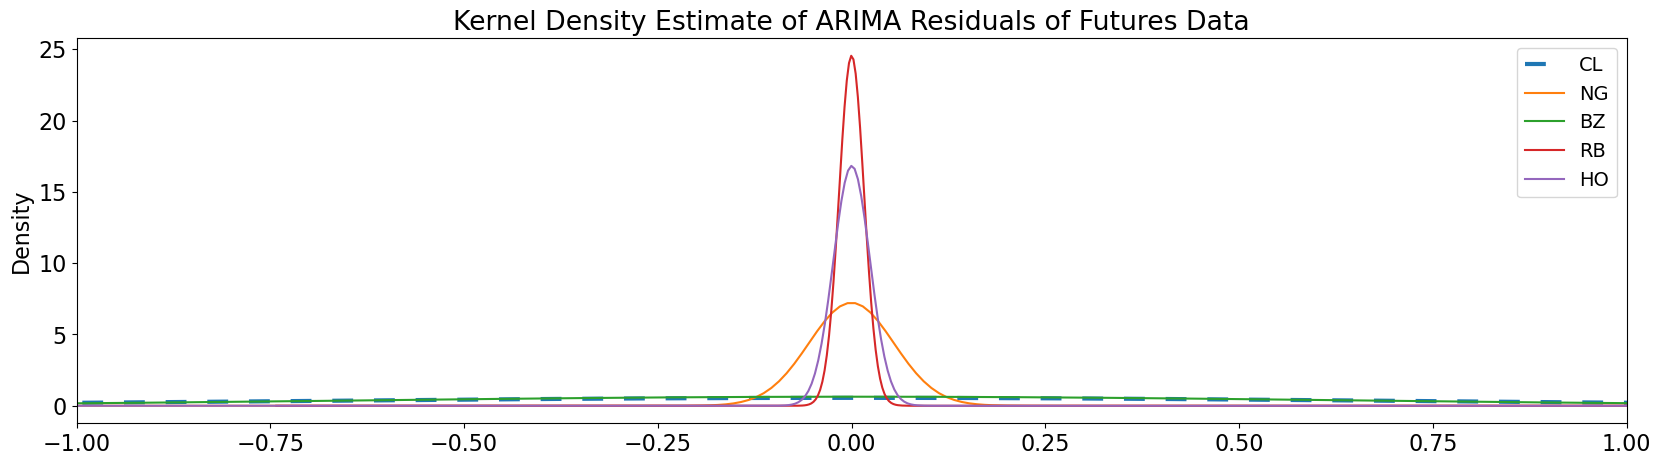

In [78]:
plt.rcParams.update({
    "font.size": 16,
    "legend.fontsize": 14
})


fig, axs = plt.subplots(1, 1, figsize=(20,5))
axs.set_xlim(-1, 1)
residuals_df = pd.read_csv(f'../ARIMA-CNN-LSTM-saved-data/{fuel_futures[0]}_ARIMA_residuals.csv', parse_dates=True)
residuals_df['Datetime'] = pd.to_datetime(residuals_df['Datetime'])
residuals_df = residuals_df.set_index(['Datetime'])
residuals_df.plot.kde(ax=axs, linestyle='dashed', dashes=[5,5], linewidth=3)

for i in [1,2,3,4]:
    residuals_df = pd.read_csv(f'../ARIMA-CNN-LSTM-saved-data/{fuel_futures[i]}_ARIMA_residuals.csv', parse_dates=True)
    residuals_df['Datetime'] = pd.to_datetime(residuals_df['Datetime'])
    residuals_df = residuals_df.set_index(['Datetime'])
    residuals_df.plot.kde(label=f'{fuel_futures[i]}', ax=axs)
    
    

axs.legend(fuel_futures)
axs.set_title('Kernel Density Estimate of ARIMA Residuals of Futures Data')
plt.show()

### 5. ARIMA-CNN-LSTM on Equity contracts

SYMBOL: ES


/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 2000x1000 with 0 Axes>

here
(631, 6)


2023-06-16 07:42:10.161970: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 64. Tune using inter_op_parallelism_threads for best performance.


here
2023-06-16 07:42:13.772786:0
2023-06-16 07:42:21.857146:100
2023-06-16 07:42:29.875883:200
2023-06-16 07:42:37.778487:300
2023-06-16 07:42:45.696618:400
2023-06-16 07:42:53.550396:500
2023-06-16 07:43:01.482385:600
2023-06-16 07:43:09.435462:700
2023-06-16 07:43:17.371164:800
2023-06-16 07:43:25.316696:900
2023-06-16 07:43:33.270658:1000
2023-06-16 07:43:41.247685:1100
2023-06-16 07:43:49.187905:1200
2023-06-16 07:43:57.149252:1300
2023-06-16 07:44:06.527179:1400
2023-06-16 07:44:15.088678:1500
2023-06-16 07:44:23.089707:1600
2023-06-16 07:44:31.018129:1700
2023-06-16 07:44:38.866869:1800
2023-06-16 07:44:46.738837:1900
2023-06-16 07:44:54.622589:2000
2023-06-16 07:45:02.489902:2100
2023-06-16 07:45:10.424432:2200
2023-06-16 07:45:18.311373:2300
2023-06-16 07:45:26.536616:2400
2023-06-16 07:45:34.734265:2500
2023-06-16 07:45:42.931578:2600
2023-06-16 07:45:51.071697:2700
2023-06-16 07:45:59.033066:2800
2023-06-16 07:46:07.767683:2900
2023-06-16 07:46:16.892982:3000
2023-06-16 07:4

2023-06-16 08:11:54 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesMultiplePricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 08:11:54 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesInstrumentData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 08:11:54 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 08:11:54 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 08:11:54 {'type': 'csvFuturesSimData'} [Warning] No key for csvSpreadCostData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
Datetime
2018-01-02 06:00:00    2644.75
2018-01-02 07:00:00    2647.25
2018-01-02 08:00:00    2647.50
201

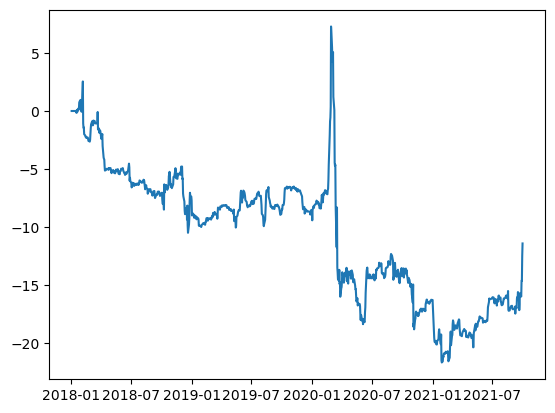

SYMBOL: NQ


/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 2000x1000 with 0 Axes>

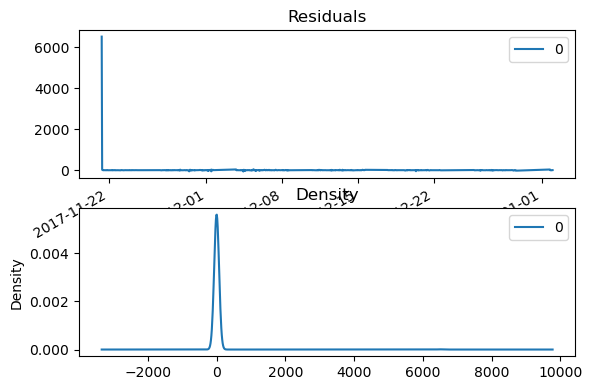

here
(631, 6)
here
2023-06-16 08:11:59.791923:0
2023-06-16 08:12:07.639315:100
2023-06-16 08:12:15.419321:200
2023-06-16 08:12:23.229045:300
2023-06-16 08:12:31.730723:400
2023-06-16 08:12:39.665642:500
2023-06-16 08:12:47.539283:600
2023-06-16 08:12:55.451621:700
2023-06-16 08:13:03.391829:800
2023-06-16 08:13:11.286528:900
2023-06-16 08:13:19.183253:1000
2023-06-16 08:13:27.067551:1100
2023-06-16 08:13:34.955719:1200
2023-06-16 08:13:42.834703:1300
2023-06-16 08:13:50.657760:1400
2023-06-16 08:13:58.507428:1500
2023-06-16 08:14:06.349509:1600
2023-06-16 08:14:14.313332:1700
2023-06-16 08:14:22.196848:1800
2023-06-16 08:14:30.068668:1900
2023-06-16 08:14:37.879873:2000
2023-06-16 08:14:45.714508:2100
2023-06-16 08:14:55.131567:2200
2023-06-16 08:15:03.831574:2300
2023-06-16 08:15:11.727102:2400
2023-06-16 08:15:19.589358:2500
2023-06-16 08:15:27.417314:2600
2023-06-16 08:15:35.267488:2700
2023-06-16 08:15:43.088620:2800
2023-06-16 08:15:50.890197:2900
2023-06-16 08:15:58.645572:3000
2

2023-06-16 08:41:56 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesMultiplePricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 08:41:56 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesInstrumentData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 08:41:56 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 08:41:56 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 08:41:56 {'type': 'csvFuturesSimData'} [Warning] No key for csvSpreadCostData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
Datetime
2018-01-02 06:00:00     6546.25
2018-01-02 07:00:00     6565.00
2018-01-02 08:00:00     6562.50


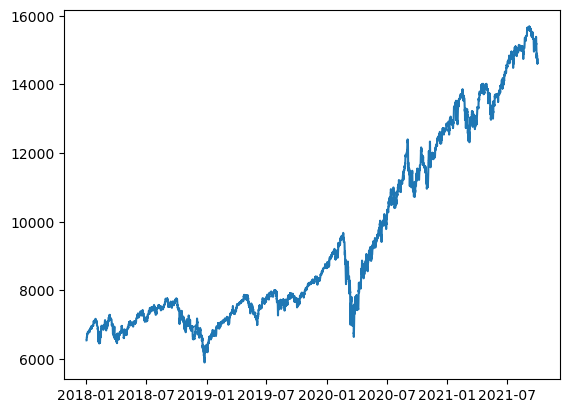

SYMBOL: FX


/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 2000x1000 with 0 Axes>

here
(631, 6)
here
2023-06-16 08:42:01.703267:0
2023-06-16 08:42:09.633327:100
2023-06-16 08:42:17.580565:200
2023-06-16 08:42:26.198711:300
2023-06-16 08:42:34.589888:400
2023-06-16 08:42:42.447076:500
2023-06-16 08:42:50.273025:600
2023-06-16 08:42:58.034870:700
2023-06-16 08:43:05.827908:800
2023-06-16 08:43:13.594798:900
2023-06-16 08:43:21.441372:1000
2023-06-16 08:43:29.249788:1100
2023-06-16 08:43:37.128049:1200
2023-06-16 08:43:44.954843:1300
2023-06-16 08:43:52.837442:1400
2023-06-16 08:44:00.634585:1500
2023-06-16 08:44:08.450973:1600
2023-06-16 08:44:16.197064:1700
2023-06-16 08:44:24.028921:1800
2023-06-16 08:44:31.834315:1900
2023-06-16 08:44:39.667659:2000
2023-06-16 08:44:48.291400:2100
2023-06-16 08:44:57.040045:2200
2023-06-16 08:45:05.689560:2300
2023-06-16 08:45:13.526897:2400
2023-06-16 08:45:21.410584:2500
2023-06-16 08:45:29.205919:2600
2023-06-16 08:45:36.990909:2700
2023-06-16 08:45:44.750447:2800
2023-06-16 08:45:52.598028:2900
2023-06-16 08:46:00.385271:3000
2

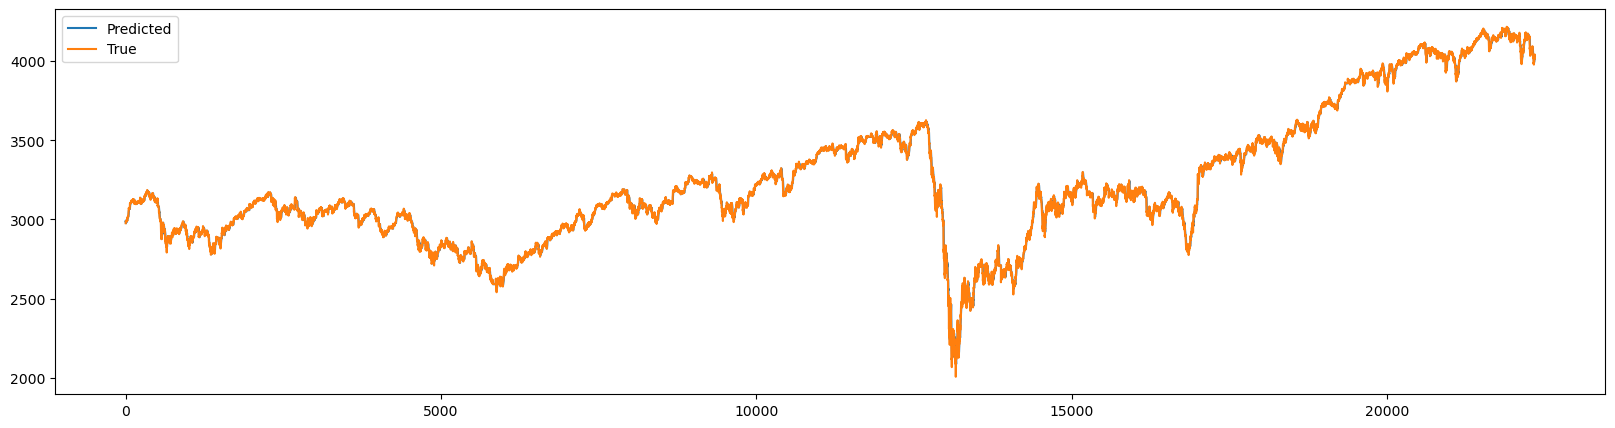

2023-06-16 09:11:44 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesMultiplePricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 09:11:44 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesInstrumentData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 09:11:44 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 09:11:44 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 09:11:44 {'type': 'csvFuturesSimData'} [Warning] No key for csvSpreadCostData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
Datetime
2018-01-02 06:00:00    2976.0
2018-01-02 07:00:00    2981.0
2018-01-02 08:00:00    2978.0
2018-0

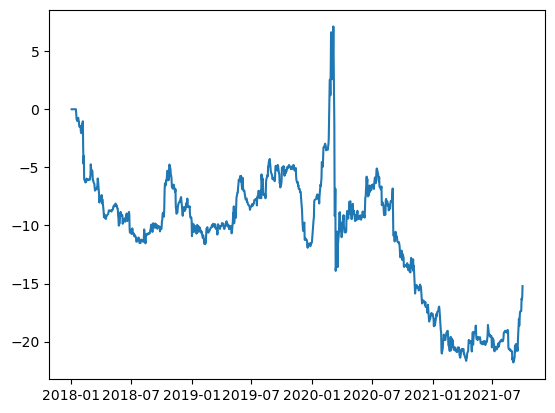

SYMBOL: DY


/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 2000x1000 with 0 Axes>

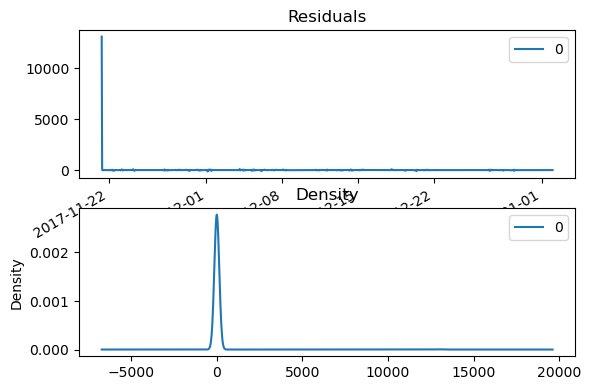

here
(631, 6)
here
2023-06-16 09:11:49.582203:0
2023-06-16 09:11:57.456712:100
2023-06-16 09:12:05.305486:200
2023-06-16 09:12:13.843428:300
2023-06-16 09:12:22.458511:400
2023-06-16 09:12:30.288534:500
2023-06-16 09:12:38.139113:600
2023-06-16 09:12:45.985042:700
2023-06-16 09:12:53.753124:800
2023-06-16 09:13:01.539496:900
2023-06-16 09:13:09.415826:1000
2023-06-16 09:13:17.245923:1100
2023-06-16 09:13:25.097707:1200
2023-06-16 09:13:33.018925:1300
2023-06-16 09:13:40.985771:1400
2023-06-16 09:13:48.908847:1500
2023-06-16 09:13:56.801904:1600
2023-06-16 09:14:04.646218:1700
2023-06-16 09:14:12.481597:1800
2023-06-16 09:14:20.304404:1900
2023-06-16 09:14:28.107784:2000
2023-06-16 09:14:36.822181:2100
2023-06-16 09:14:45.475178:2200
2023-06-16 09:14:54.150261:2300
2023-06-16 09:15:02.040644:2400
2023-06-16 09:15:09.858766:2500
2023-06-16 09:15:17.639533:2600
2023-06-16 09:15:25.491843:2700
2023-06-16 09:15:33.324732:2800
2023-06-16 09:15:41.094067:2900
2023-06-16 09:15:48.883421:3000
2

2023-06-16 09:41:31 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesMultiplePricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 09:41:31 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesInstrumentData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 09:41:31 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 09:41:31 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 09:41:31 {'type': 'csvFuturesSimData'} [Warning] No key for csvSpreadCostData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
Datetime
2018-01-02 06:00:00    12666.0
2018-01-02 07:00:00    12662.0
2018-01-02 08:00:00    12646.0
201

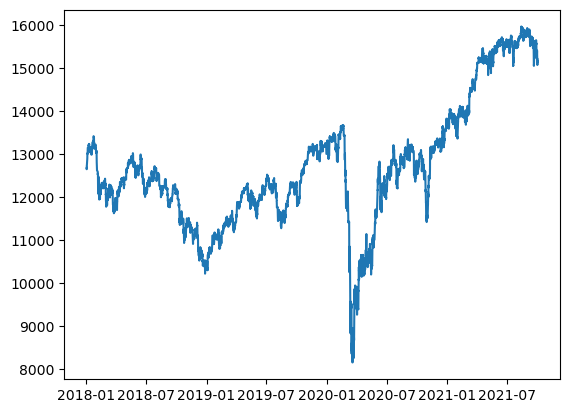

SYMBOL: X


/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/rds/general/user/zm520/home/anaconda3/envs/mlproject2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 2000x1000 with 0 Axes>

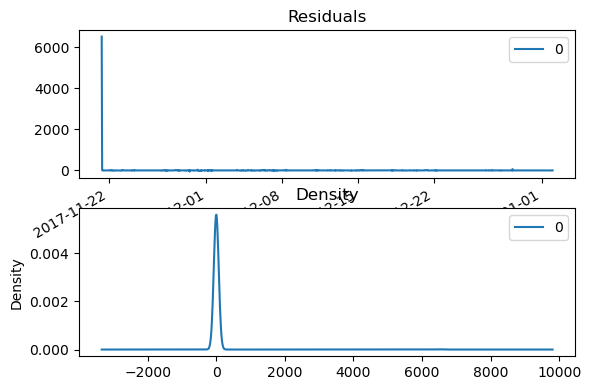

here
(631, 6)
here
2023-06-16 09:41:36.623789:0
2023-06-16 09:41:44.424836:100
2023-06-16 09:41:52.264914:200
2023-06-16 09:42:00.225830:300
2023-06-16 09:42:08.689263:400
2023-06-16 09:42:17.653065:500
2023-06-16 09:42:25.794857:600
2023-06-16 09:42:33.719146:700
2023-06-16 09:42:41.632234:800
2023-06-16 09:42:49.583517:900
2023-06-16 09:42:57.434535:1000
2023-06-16 09:43:05.332284:1100
2023-06-16 09:43:13.164705:1200
2023-06-16 09:43:21.021476:1300
2023-06-16 09:43:28.830400:1400
2023-06-16 09:43:36.646976:1500
2023-06-16 09:43:44.457558:1600
2023-06-16 09:43:52.239261:1700
2023-06-16 09:44:00.196282:1800
2023-06-16 09:44:08.025882:1900
2023-06-16 09:44:15.866345:2000
2023-06-16 09:44:23.666202:2100
2023-06-16 09:44:32.196700:2200
2023-06-16 09:44:40.879938:2300
2023-06-16 09:44:49.609163:2400
2023-06-16 09:44:57.711001:2500
2023-06-16 09:45:05.563544:2600
2023-06-16 09:45:13.395263:2700
2023-06-16 09:45:21.231034:2800
2023-06-16 09:45:29.009495:2900
2023-06-16 09:45:36.816425:3000
2

2023-06-16 10:11:20 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesMultiplePricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 10:11:20 {'type': 'csvFuturesSimData'} [Warning] No key for csvFuturesInstrumentData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 10:11:20 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 10:11:20 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2023-06-16 10:11:20 {'type': 'csvFuturesSimData'} [Warning] No key for csvSpreadCostData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
Datetime
2018-01-02 06:00:00    6774.0
2018-01-02 07:00:00    6770.0
2018-01-02 08:00:00    6764.5
2018-0

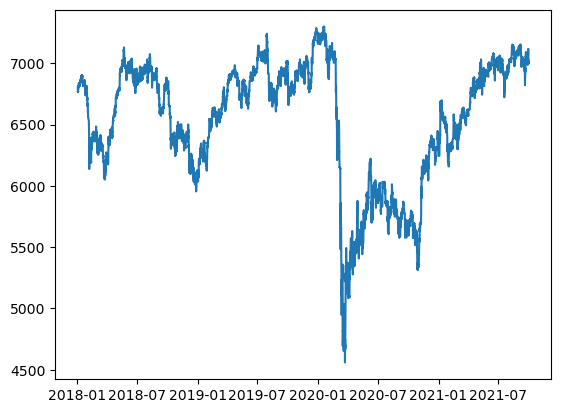

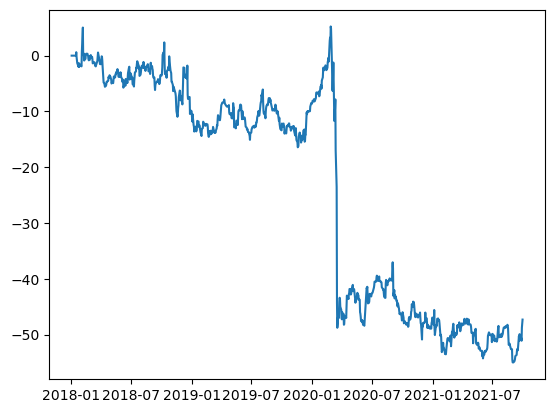

In [6]:
futures_data = pd.read_parquet('../data/equity_indices_first_rate_data_R_prices.parquet')

accounts = []
for i in range(len(equity_futures)):
    print(f"SYMBOL: {equity_futures[i]}")
    curr_futures_data = futures_data[equity_futures[i]]
    
    test_start_datetime = pd.Timestamp('2018-01-02')
    
    short_train_set_size = 1000
    train_start_datetime = test_start_datetime - pd.Timedelta(hours=short_train_set_size)
    short_training_set = curr_futures_data.loc[train_start_datetime:test_start_datetime]
    short_training_set
    
    short_test_set_size = 250
    
    short_test_set = curr_futures_data.loc[test_start_datetime:]
    short_test_set
    
    model2 = sm.tsa.ARIMA(endog=short_training_set, order=(2, 1, 0)).fit()
    residuals = pd.DataFrame(model2.resid)
    plt.figure(figsize=(20, 10))
    fig, ax = plt.subplots(2, 1)
    residuals.plot(title="Residuals", ax=ax[0])
    residuals.plot(kind='kde', title='Density', ax=ax[1])
    plt.savefig(f'../ARIMA-CNN-LSTM-figs/{equity_futures[i]}_ARIMA_residuals')
    plt.show()
    
    print('here')
    residuals.to_csv(f'../ARIMA-CNN-LSTM-saved-data/{equity_futures[i]}_ARIMA_residuals.csv')
    
    time_steps = 6

    short_train_X, short_train_y = split_sequence(short_training_set, time_steps)

    short_test_X, short_test_y = split_sequence(short_test_set, time_steps)
    
    batch_size = 7
    lstm_units = 64

    # Reshape training data
    n_seq = 2
    n_steps = time_steps // n_seq
    print(short_train_X.shape)
    short_train_X = short_train_X.reshape(short_train_X.shape[0], n_seq, n_steps, 1)

    # Create the CNN-LSTM Model
    cnn_lstm_model = Sequential()
    cnn_lstm_model.add(
        TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, 1)))
    cnn_lstm_model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    cnn_lstm_model.add(TimeDistributed(Flatten()))
    cnn_lstm_model.add(LSTM(50, activation='relu'))
    cnn_lstm_model.add(Dense(1))
    cnn_lstm_model.compile(optimizer='adam', loss='mse')
    # fit model
    cnn_lstm_model.fit(short_train_X, short_train_y, epochs=50, verbose=0)
    print('here')
    predictions = []
    for j, test_sample in enumerate(short_test_X):
        # For each test sample, make a prediction and append to an overall list of predictions
        test_sample = test_sample.reshape(1, n_seq, n_steps, 1)
        pred_price = cnn_lstm_model.predict(test_sample, verbose = 0)
        reshaped_pred_price = np.reshape(pred_price, (1,)).item()
        predictions.append(reshaped_pred_price)
        if (j % 100 == 0):
            print(str(datetime.now()) + ':' + str(j))

    plt.figure(figsize=(20,5))
    plt.plot(predictions, label='Predicted')
    plt.plot(short_test_y, label='True')
    plt.legend()
    plt.savefig(f'../ARIMA-CNN-LSTM-figs/{equity_futures[i]}_pred_true')
    plt.show()
    
    
    predictions = pd.Series(predictions, index=short_test_set.index[time_steps:])
    predictions.to_csv(f'../ARIMA-CNN-LSTM-saved-data/{equity_futures[i]}_predictions.csv')
    plt.plot(predictions)
    
    forecasts = predictions.diff()
    
    source_dataframe = pd.read_parquet('../data/equity_indices_first_rate_data_R_prices.parquet')

    column = equity_futures[i]

    # Convert column into csv file
    csv_path = f"../pysystemtrade/data/firstrate_futures/{equity_futures[i]}.csv"
    futures_data[equity_futures[i]].to_csv(csv_path, header=["price"])

    # Replaces 'Datetime' with 'DATETIME' in csv file to match with pysystemtrade's data
    in_csv_file = open(csv_path, "r")
    csv_reader = csv.reader(in_csv_file)

    lines = list(csv_reader)
    lines[0][0] = 'DATETIME'  # The cell at (0,0) will always be 'Datetime'

    out_csv_file = open(csv_path, "w")
    csv_writer = csv.writer(out_csv_file)
    csv_writer.writerows(lines)

    in_csv_file.close()
    out_csv_file.close()

    # Convert csv data into data object for pysystemtrade
    instrument_data = csvFuturesSimData(csv_data_paths=dict(csvFuturesAdjustedPricesData="data.firstrate_futures"))

    # Get daily prices and calculate the ewmac forecast
    price = instrument_data.get_raw_price(column)[test_start_datetime:]
    
    price = curr_futures_data[test_start_datetime:]
    price = price[time_steps:]
    print(price)
    print(forecasts)
    
#     short_test_y_pd = pd.DataFrame(short_test_y, index=short_test_set.index[time_steps:])
    
    account = pandl_for_instrument_forecast(forecast=forecasts, price=price)
    accounts.append(account)
    
    plt.figure()
    plt.plot(account.curve(), label={equity_futures[i]})
    plt.savefig(f'../ARIMA-CNN-LSTM-figs/{equity_futures[i]}_pnl')
    plt.show()


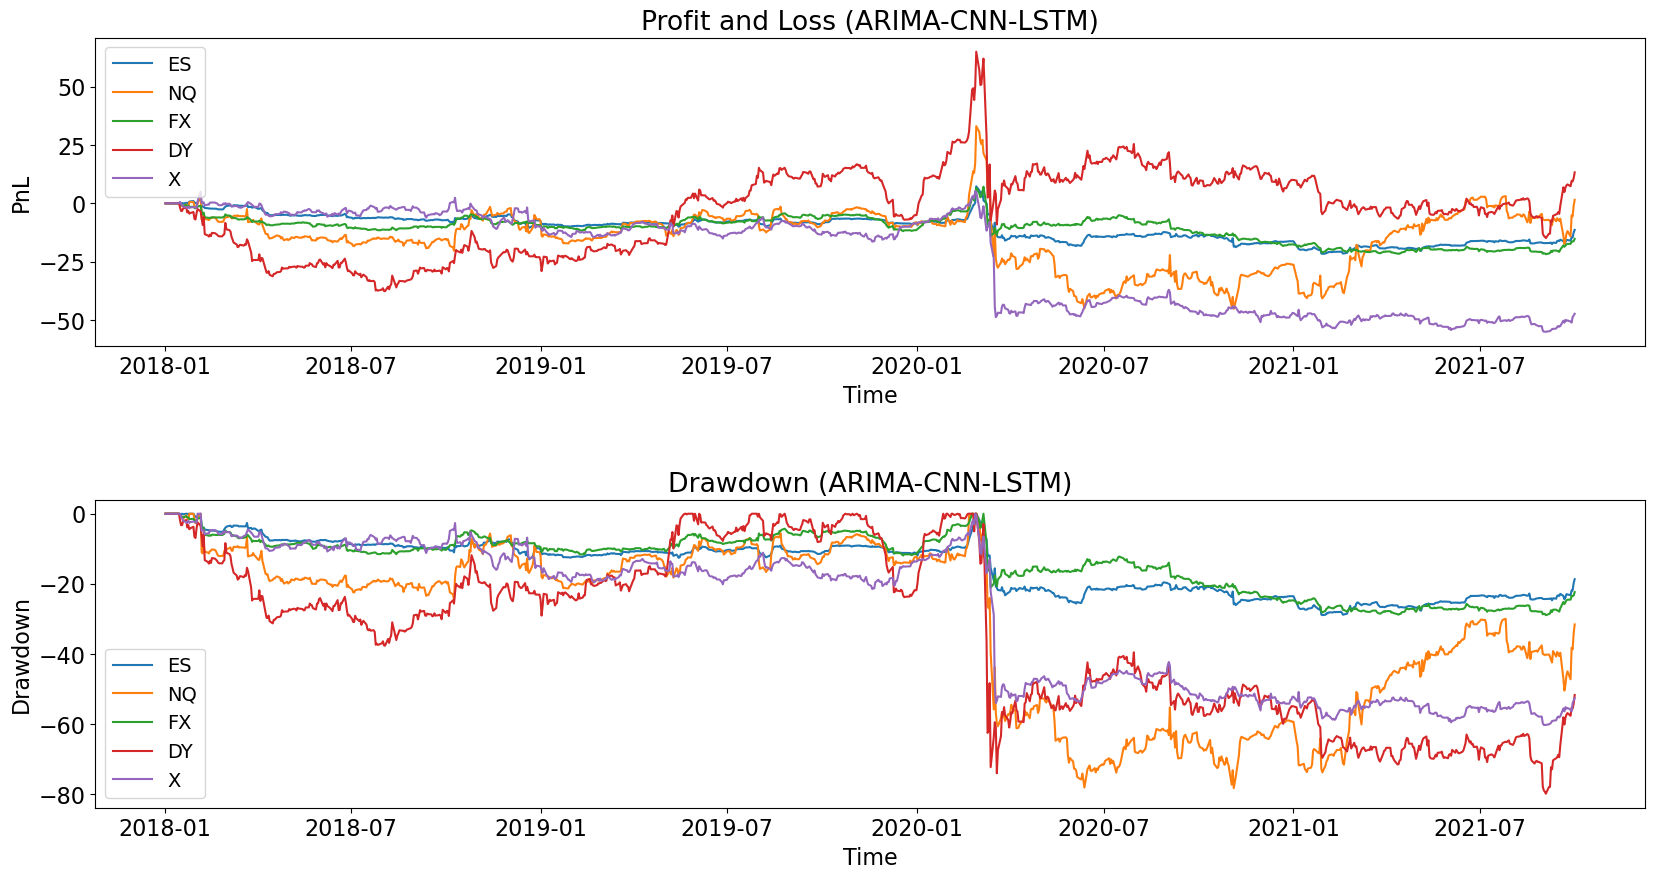

In [68]:
plt.rcParams.update({
    "font.size": 16,
    "legend.fontsize": 14
})

figure, axs = plt.subplots(2, 1, figsize=(20, 10))
figure.subplots_adjust(hspace=0.5)
for l in range(len(accounts)):
    axs[0].plot(accounts[l].curve(), label=f'{equity_futures[l]}')
    axs[0].title.set_text('Profit and Loss (ARIMA-CNN-LSTM)')
    axs[0].legend()
    axs[0].set_ylabel('PnL')
    axs[0].set_xlabel('Time')

    axs[1].plot(accounts[l].drawdown(), label=f'{equity_futures[l]}')
    axs[1].legend()
    axs[1].title.set_text('Drawdown (ARIMA-CNN-LSTM)')
    axs[1].set_ylabel('Drawdown')
    axs[1].set_xlabel('Time')

In [153]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams.update({
    "font.size": 16,
})


fig, axs = plt.subplots(1, 1, figsize=(20,5))
axs.set_xlim(-500, 500)
# for i in range(len(equity_futures)):
for i in [0,1,2,3]:
    residuals_df = pd.read_csv(f'../ARIMA-CNN-LSTM-saved-data/{equity_futures[i]}_ARIMA_residuals.csv', parse_dates=True)
    residuals_df['Datetime'] = pd.to_datetime(residuals_df['Datetime'])
    residuals_df = residuals_df.set_index(['Datetime'])
    residuals_df.plot.kde(ax=axs)
    
residuals_df = pd.read_csv(f'../ARIMA-CNN-LSTM-saved-data/{equity_futures[4]}_ARIMA_residuals.csv', parse_dates=True)
residuals_df['Datetime'] = pd.to_datetime(residuals_df['Datetime'])
residuals_df = residuals_df.set_index(['Datetime'])
residuals_df.plot.kde(ax=axs, linestyle='dashed', dashes=[15,15])
axs.legend(equity_futures)
axs.set_title('Kernel Density Estimate of ARIMA Residuals of Futures Data')
plt.show()

In [8]:
account_statistics = pd.DataFrame(columns=fuel_futures)

for i in range(len(accounts)):
    
    account_statistics['STATISTICS'] = pd.Series(list(dict(accounts[i].percent.stats()[0]).keys()))

    account_statistics[fuel_futures[i]] = pd.Series([float(x) for x in list(dict(accounts[i].percent.stats()[0]).values())])
    
    print(round(accounts[i].curve().iloc[-1], 6))
            
account_statistics_rounded = account_statistics.round(decimals=6)
account_statistics_rounded

-11.395668
1.487307
-15.224653
13.258092
-47.316366


CL         NG        BZ         RB        HO              STATISTICS
0   -5.16900 -16.120000  -8.45200 -33.490000 -20.72000                     min
1    6.90900  15.760000   5.10300  18.040000   4.27700                     max
2    0.00578   0.029170   0.00000   0.009421   0.00000                  median
3   -0.01164   0.001519  -0.01555   0.013540  -0.04833                    mean
4    0.58390   1.978000   0.68120   2.528000   1.23300                     std
5   -0.36440  -1.003000  -4.05800  -3.744000  -6.29500                    skew
6   -2.98000   0.388900  -3.98100   3.467000 -12.37000                ann_mean
7    9.34300  31.650000  10.90000  40.440000  19.72000                 ann_std
8   -0.31890   0.012290  -0.36530   0.085730  -0.62730                  sharpe
9   -0.33260   0.013010  -0.35210   0.083090  -0.55870                 sortino
10 -15.06000 -31.020000 -13.83000 -33.700000 -28.80000            avg_drawdown
11   0.98260   0.982600   0.98570   0.962200   0.98570        time_in_drawdown
12  -0.10310   0.004971  -0.13770   0.043420  -0.20540                  calmar
13  -0.19790   0.012540  -0.28780   0.102900  -0.42970  avg_return_to_drawdown
14  -0.30640  -1.100000  -0.37200  -1.361000  -0.71440                avg_loss
15   0.26350   1.001000   0.33690   1.277000   0.59150                avg_gain
16   0.85990   0.910100   0.90560   0.938800   0.82800         gaintolossratio
17   0.92050   1.003000   0.91330   1.021000   0.85660            profitfactor
18   0.51700   0.524300   0.50210   0.521100   0.50850                 hitrate
19  -0.62370   0.024030  -0.71430   0.167600  -1.22700                  t_stat
20   0.53300   0.980800   0.47520   0.866900   0.22020                 p_value

### 6. Additional Forecast Plots

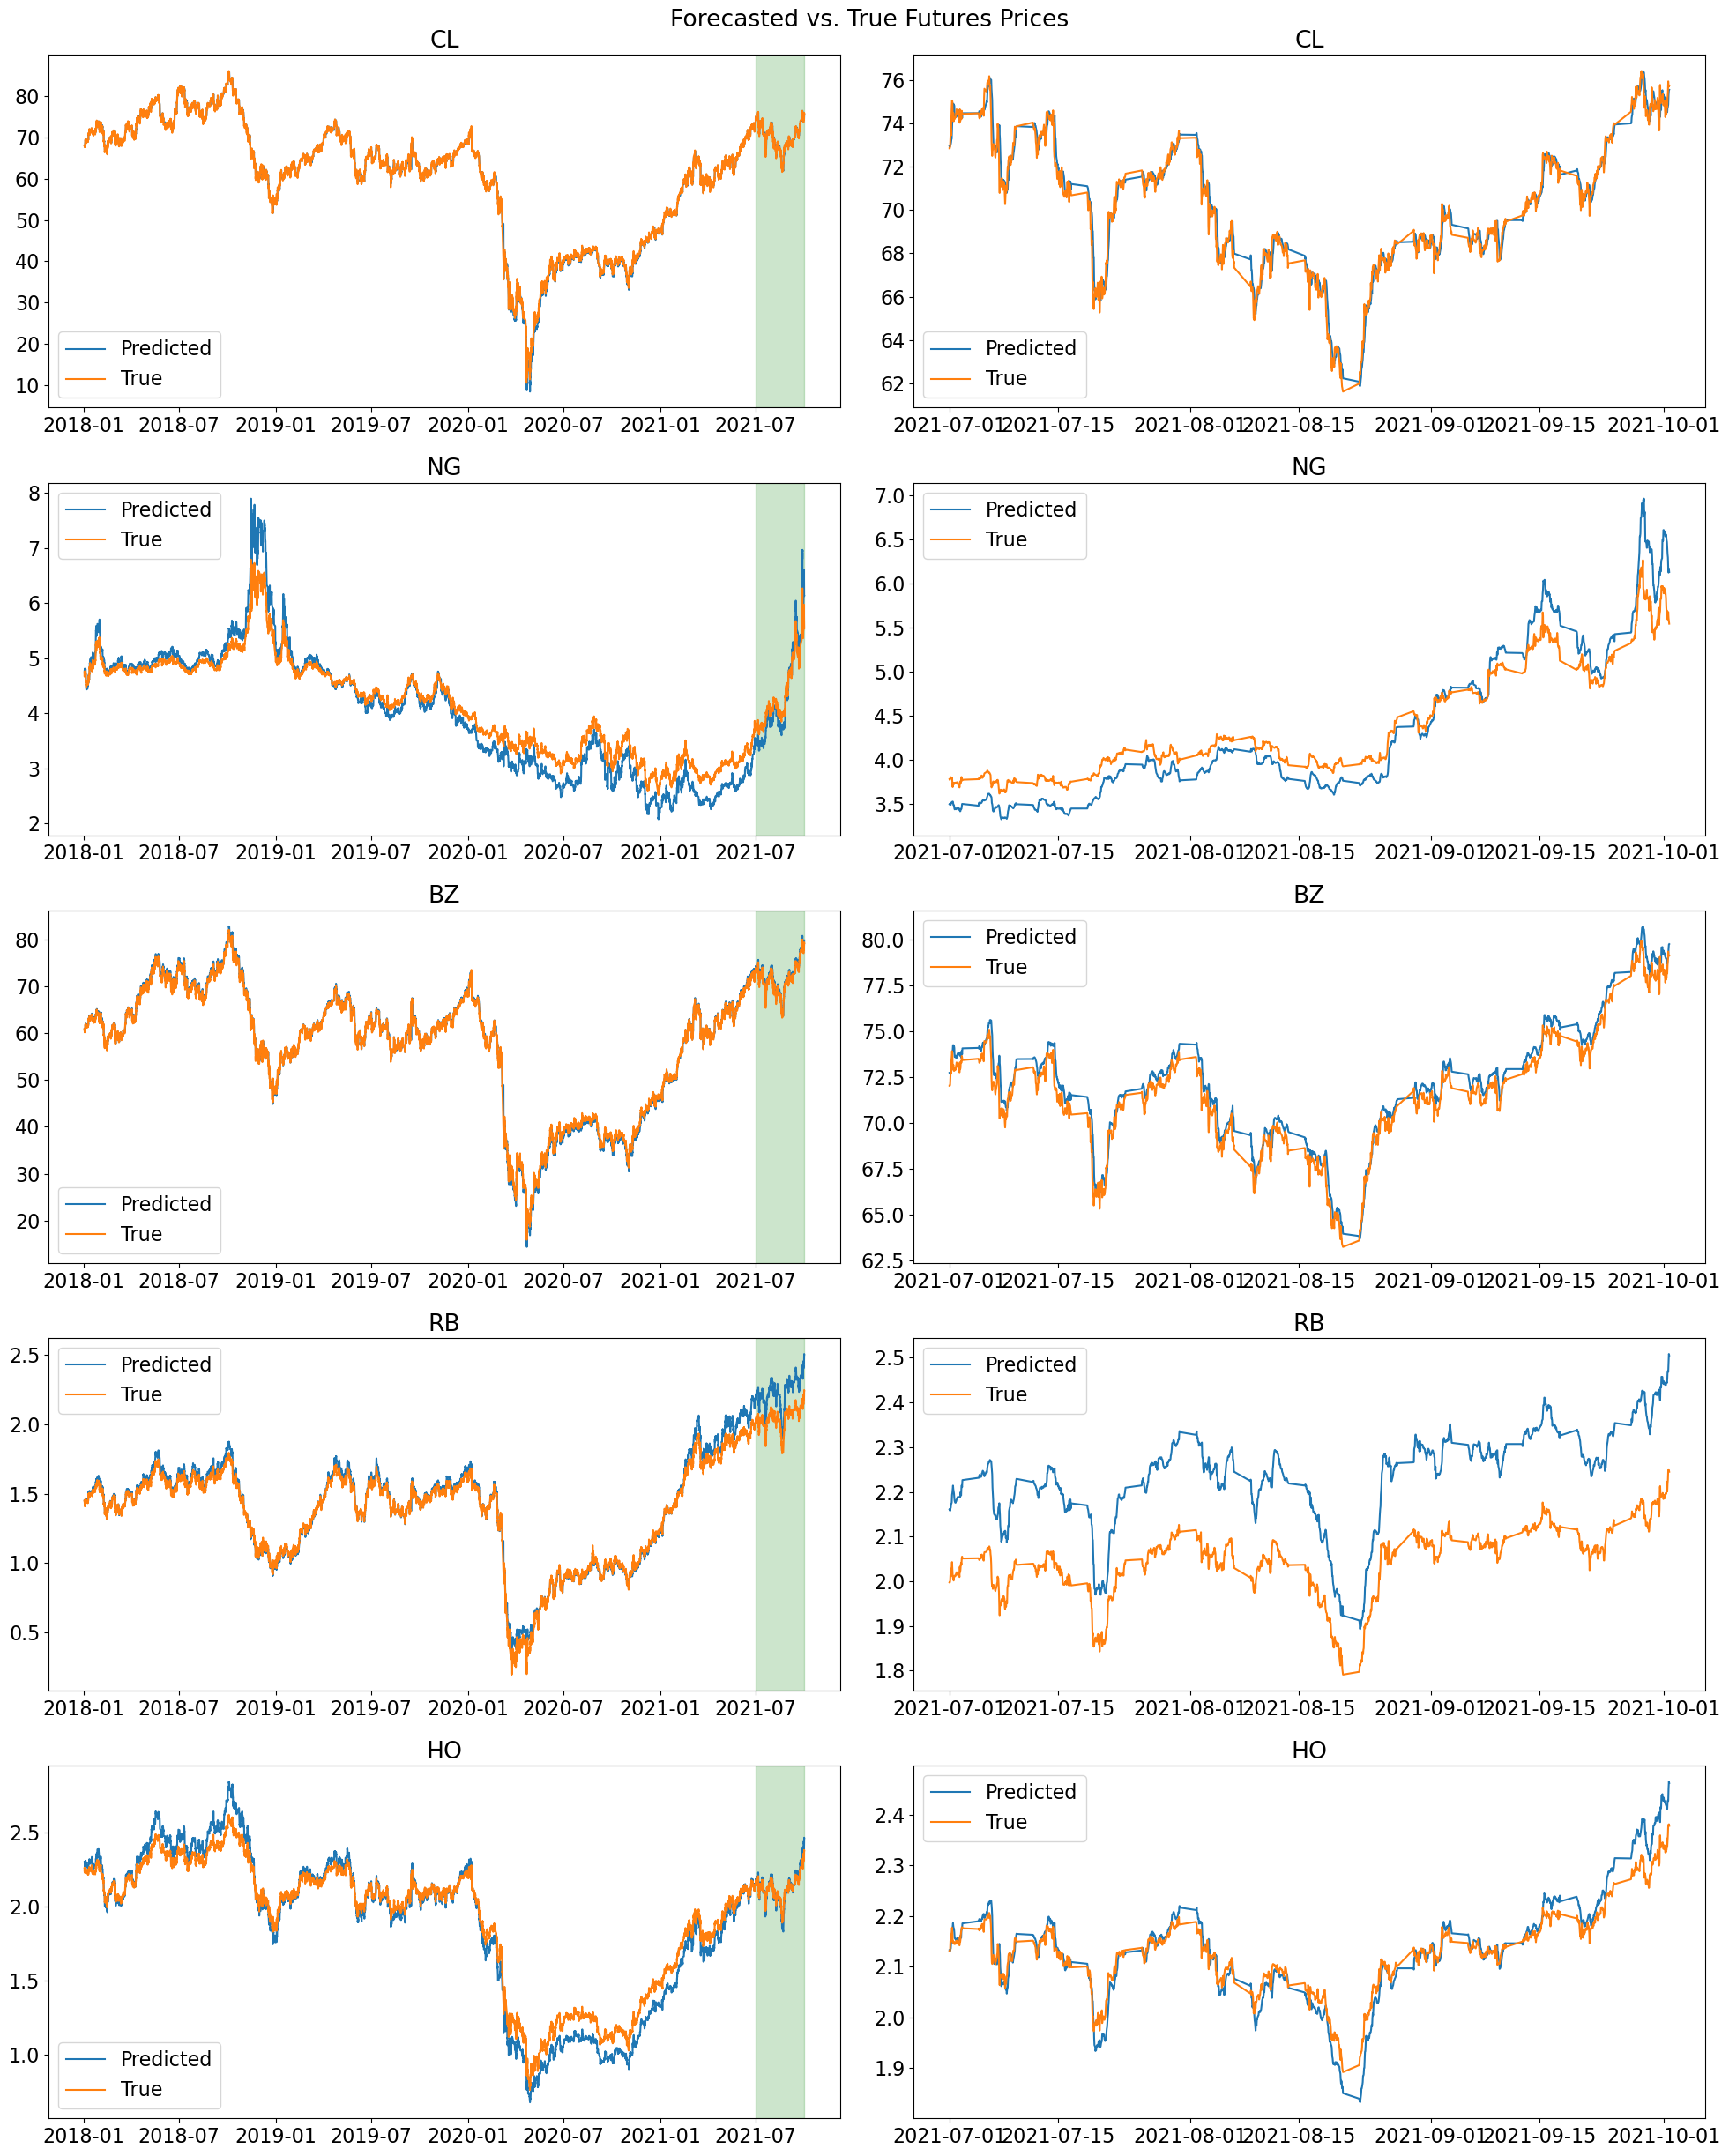

In [159]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

plt.rcParams.update({
    "font.size": 16
})

fuel_accounts = []
prediction_figs, prediction_axs = plt.subplots(5, 2, figsize=(20, 25))
fuel_futures_data = pd.read_parquet('../data/fuel_first_rate_data_R_prices.parquet')[test_start_datetime:]

for i in range(len(fuel_futures)):    
    fuel_preds = pd.read_csv(f'../ARIMA-CNN-LSTM-saved-data/{fuel_futures[i]}_predictions.csv', parse_dates=True)
    fuel_preds['Datetime'] = pd.to_datetime(fuel_preds['Datetime'])
    fuel_preds = fuel_preds.set_index(['Datetime'])
    
    
    
    prediction_axs[i, 0].plot(fuel_preds, label='Predicted')
    prediction_axs[i, 0].plot(fuel_futures_data[fuel_futures[i]], label='True')
    prediction_axs[i, 0].legend()
    
    prediction_axs[i, 1].plot(fuel_preds['2021-07-01':], label='Predicted')
    prediction_axs[i, 1].plot(fuel_futures_data[fuel_futures[i]]['2021-07-01':], label='True')
    prediction_axs[i, 1].legend()
    
    prediction_axs[i, 0].axvspan(datetime(2021,7,1) , datetime(2021,10,1), color="green", alpha=0.2)
    prediction_axs[i, 0].set_title(f'{fuel_futures[i]}')
    prediction_axs[i, 1].set_title(f'{fuel_futures[i]}')


prediction_figs.suptitle('Forecasted vs. True Futures Prices')
plt.tight_layout()
plt.savefig('../ARIMA-CNN-LSTM-figs/fuel_forecasts.png')
plt.show()

### 7. Calculating Mean Absolute Percentage Error

In [19]:
def calculate_mape(actual: pd.Series, forecast: pd.Series):
    actual_np = actual.to_numpy()
    forecast_np = forecast.to_numpy()
    
    absolute_diffs = np.abs(np.divide((actual_np - forecast_np), actual_np))
    return absolute_diffs.mean()* 100
    

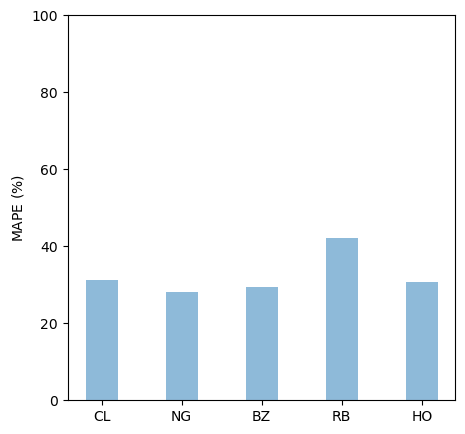

In [29]:
test_start_datetime = pd.Timestamp('2018-01-02')
fuel_futures_data = pd.read_parquet('../data/fuel_first_rate_data_R_prices.parquet')[test_start_datetime:]
fuel_mapes = np.ones(len(fuel_futures))
for i in range(len(fuel_futures)):
    fuel_preds = pd.read_csv(f'../ARIMA-CNN-LSTM-saved-data/{fuel_futures[i]}_predictions.csv', parse_dates=True)
    fuel_preds['Datetime'] = pd.to_datetime(fuel_preds['Datetime'])
    fuel_preds = fuel_preds.set_index(['Datetime'])
    
    fuel_actual = fuel_futures_data[fuel_futures[i]]
    fuel_mapes[i] = calculate_mape(fuel_actual, fuel_preds)
    
plt.figure(figsize=(5,5))
y = np.arange(len(fuel_mapes))
plt.bar(y, fuel_mapes, align='center', alpha=0.5, width=0.4)
plt.ylim(0,100)
plt.xticks(y, fuel_futures)
plt.ylabel('MAPE ($\%$)')
plt.show()

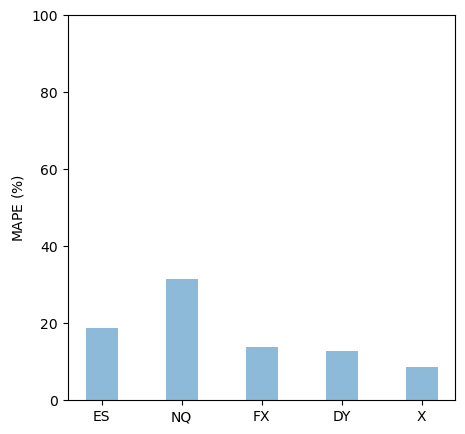

In [38]:
test_start_datetime = pd.Timestamp('2018-01-02')
equity_futures_data = pd.read_parquet('../data/equity_indices_first_rate_data_R_prices.parquet')[test_start_datetime:]
equity_mapes = np.ones(len(equity_futures))
for i in range(len(equity_futures)):
    equity_preds = pd.read_csv(f'../ARIMA-CNN-LSTM-saved-data/{equity_futures[i]}_predictions.csv', parse_dates=True)
    equity_preds['Datetime'] = pd.to_datetime(equity_preds['Datetime'])
    equity_preds = equity_preds.set_index(['Datetime'])
    
    equity_actual = equity_futures_data[equity_futures[i]]
    equity_mapes[i] = calculate_mape(equity_actual, equity_preds)
    
plt.figure(figsize=(5,5))
y = np.arange(len(fuel_mapes))
plt.bar(y, equity_mapes, align='center', alpha=0.5, width=0.4)
plt.ylim(0,100)
plt.xticks(y, equity_futures)
plt.ylabel('MAPE ($\%$)')
plt.show()

In [160]:
plt.rcParams.update({
    "font.size": 16
})

eq_accounts = []
prediction_figs, prediction_axs = plt.subplots(5, 2, figsize=(20, 25))
eq_futures_data = pd.read_parquet('../data/equity_indices_first_rate_data_R_prices.parquet')[test_start_datetime:]

for i in range(len(equity_futures)):    
    eq_preds = pd.read_csv(f'../ARIMA-CNN-LSTM-saved-data/{equity_futures[i]}_predictions.csv', parse_dates=True)
    eq_preds['Datetime'] = pd.to_datetime(eq_preds['Datetime'])
    eq_preds = eq_preds.set_index(['Datetime'])
    
    prediction_axs[i, 0].plot(eq_preds, label='Predicted')
    prediction_axs[i, 0].plot(eq_futures_data[equity_futures[i]], label='True')
    prediction_axs[i, 0].legend()
    
    prediction_axs[i, 1].plot(eq_preds['2021-07-01':], label='Predicted')
    prediction_axs[i, 1].plot(eq_futures_data[equity_futures[i]]['2021-07-01':], label='True')
    prediction_axs[i, 1].legend()
    
    prediction_axs[i, 0].axvspan(datetime(2021,7,1) , datetime(2021,10,1), color="green", alpha=0.2)
    prediction_axs[i, 0].set_title(f'{equity_futures[i]}')
    prediction_axs[i, 1].set_title(f'{equity_futures[i]}')

prediction_figs.suptitle('Forecasted vs. True Futures Prices')
plt.tight_layout()
plt.savefig('../ARIMA-CNN-LSTM-figs/equity_forecasts.png')
plt.show()